<a href="https://colab.research.google.com/github/Nisarg07/Constructify_flutter/blob/master/Assignment(Classification).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [266]:
import numpy
import pandas as pd
import matplotlib as mplot
import seaborn as sns

In [267]:
dataset=pd.read_csv("train.csv")
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [268]:
print(dataset.isna().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


        Survived
Sex             
female  0.742038
male    0.188908
          Survived
Embarked          
C         0.553571
Q         0.389610
S         0.339009


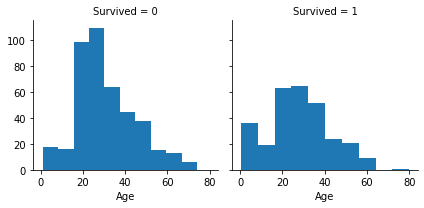

In [269]:
print(dataset[['Sex','Survived']].groupby(['Sex']).mean())
dataset['Embarked']=dataset['Embarked'].replace(numpy.nan,'S')
print(dataset[['Embarked','Survived']].groupby(['Embarked']).mean())
a=sns.FacetGrid(dataset,col='Survived')
a.map(mplot.pyplot.hist,'Age')

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


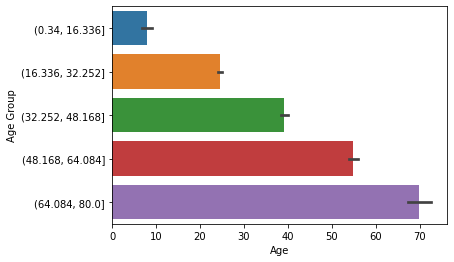

In [270]:
dataset['Age Group']=pd.cut(dataset['Age'],5)
sns.barplot(dataset['Age'],dataset['Age Group'])

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


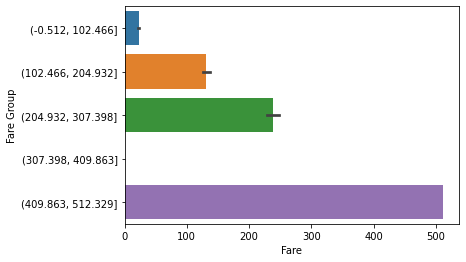

In [271]:
dataset['Fare Group']=pd.cut(dataset['Fare'],5)
sns.barplot(dataset['Fare'],dataset['Fare Group'])


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


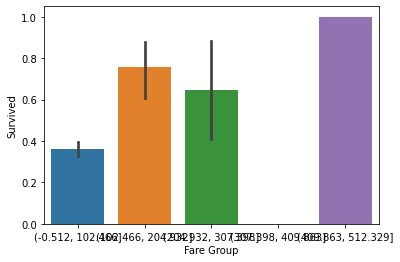

In [272]:
sns.barplot(dataset['Fare Group'],dataset['Survived'])

In [273]:
y=dataset['Survived'].values
x=dataset.drop(labels="Survived",axis=1)
x['Family Size']=x['SibSp']+x['Parch']+1
x['Sex']=x['Sex'].replace('female',0)
x['Sex']=x['Sex'].replace('male',1)
x['Embarked']=x['Embarked'].replace('C',0)
x['Embarked']=x['Embarked'].replace('Q',1)
x['Embarked']=x['Embarked'].replace('S',2)
x['Age']=x['Age'].replace(numpy.nan,x['Age'].mean()).astype(int)
x.loc[x['Age']<=16,'Age']=0
x.loc[(x['Age']>16) & (x['Age']<=32),'Age']=1
x.loc[(x['Age']>32) & (x['Age']<=64),'Age']=2
x.loc[x['Age']>64,'Age']=3
x.loc[x['Fare']<=102,'Fare']=0
x.loc[(x['Fare']>102) & (x['Fare']<=204),'Fare']=1
x.loc[(x['Fare']>204) & (x['Fare']<=409),'Fare']=2
x.loc[(x['Fare']>409) & (x['Fare']<=512),'Fare']=3
x.loc[x['Fare']>512,'Fare']=4

x=x.drop(["PassengerId","Name","Ticket",'SibSp',"Parch","Cabin","Age Group","Fare Group"],axis=1)
x.info()
print(x.isna().sum())
print(x.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Pclass       891 non-null    int64  
 1   Sex          891 non-null    int64  
 2   Age          891 non-null    int64  
 3   Fare         891 non-null    float64
 4   Embarked     891 non-null    int64  
 5   Family Size  891 non-null    int64  
dtypes: float64(1), int64(5)
memory usage: 41.9 KB
Pclass         0
Sex            0
Age            0
Fare           0
Embarked       0
Family Size    0
dtype: int64
(891, 6)


In [274]:
train_data,features=x.shape
x=x.values
n_hd1=10
n_hd2=8
n_hd3=5
n_out=2


In [275]:
def activationfunc(x):
  return numpy.sin(x)
def d_activationfunc(x):
  return numpy.cos(x)
def error(o,y):
  err=y-o
  return err
Z=numpy.zeros((891,2))
for i in range(891):
  Z[i,y[i]]=1

In [276]:
acc=[]
loss=[]
def NN_3HDLAYER():
  w1=numpy.random.rand(features,n_hd1)
  w2=numpy.random.rand(n_hd1,n_hd2)
  w3=numpy.random.rand(n_hd2,n_hd3)
  w4=numpy.random.rand(n_hd3,n_out)
  dw1=numpy.zeros(w1.shape,float)
  dw2=numpy.zeros(w2.shape,float)
  dw3=numpy.zeros(w3.shape,float)
  dw4=numpy.zeros(w4.shape,float)
  alpha=1
  lr1=0.1
  lr2=0.1
  lr3=0.1
  lr4=0.1
  # print(b1.shape)
  epoch=1000
  for i in range(epoch):
    error1=[]
    #=====Feed-Forward====#

    #hidden layer 1
    h1=x.dot(w1)#x.dot(w1)
    ho1=activationfunc(h1)
    #hidden layer 2
    h2=ho1.dot(w2)#ho1.dot(w2)
    ho2=activationfunc(h2)
    #hidden layer 3
    h3=ho2.dot(w3)#ho2.dot(w3)
    ho3=activationfunc(h3)
    #output layer
    o=(ho3.dot(w4))
    
    #====Back-Propogation====#

    delta_ou=error(o,Z)
    error1.append(error(o,Z))
    delta_hd3=numpy.multiply(delta_ou.dot(w4.T),d_activationfunc(h3))
    delta_hd2=numpy.multiply(delta_hd3.dot(w3.T),d_activationfunc(h2))
    delta_hd1=numpy.multiply(delta_hd2.dot(w2.T),d_activationfunc(h1))
    dw4=1/len(y)*(ho3.T).dot(delta_ou)
    dw3=1/len(y)*(ho2.T).dot(delta_hd3)
    dw2=1/len(y)*(ho1.T).dot(delta_hd2)
    dw1=1/len(y)*(x.T).dot(delta_hd1)
    w1=w1+lr1*dw1
    w2=w2+lr2*dw2
    w3=w3+lr3*dw3
    w4=w4+lr4*dw4

    #====Accuracy====#

    print("epoch-",i+1,"accuracy=======>",(1-(numpy.mean((sum(delta_ou)/len(x)))))*100)
    acc.append((1-(numpy.mean((sum(delta_ou)/len(x)))))*100) 
    loss.append((numpy.mean((sum(delta_ou)/len(x)))))
  return w1,w2,w3,w4,acc,loss

epoch- 1 accuracy=======> 7.198016623761017
epoch- 2 accuracy=======> -4.414356591903479
epoch- 3 accuracy=======> -43.575719626543204
epoch- 4 accuracy=======> 39.13140371213918
epoch- 5 accuracy=======> 49.41799919119047
epoch- 6 accuracy=======> 20.27786561712528
epoch- 7 accuracy=======> 47.06538943271463
epoch- 8 accuracy=======> 49.728634689757186
epoch- 9 accuracy=======> 55.1365015709429
epoch- 10 accuracy=======> 54.00871097140283
epoch- 11 accuracy=======> 56.38376739444927
epoch- 12 accuracy=======> 58.223779252889244
epoch- 13 accuracy=======> 59.83954216720683
epoch- 14 accuracy=======> 60.29245317772669
epoch- 15 accuracy=======> 60.56836828724224
epoch- 16 accuracy=======> 60.87688569982668
epoch- 17 accuracy=======> 61.20592483549711
epoch- 18 accuracy=======> 61.5504537149798
epoch- 19 accuracy=======> 61.90932035272524
epoch- 20 accuracy=======> 62.281049894150954
epoch- 21 accuracy=======> 62.6640314063379
epoch- 22 accuracy=======> 63.05671870927571
epoch- 23 accura

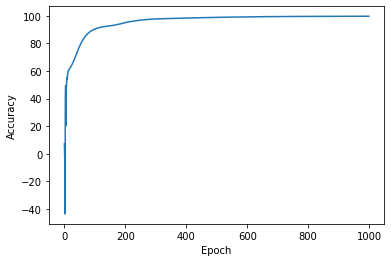

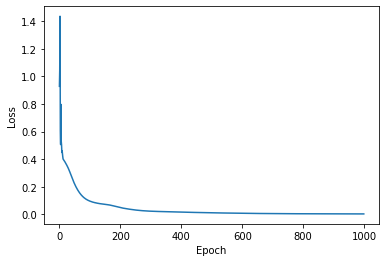

In [277]:
W1,W2,W3,W4,acc,loss=NN_3HDLAYER()
mplot.pyplot.plot(acc)
mplot.pyplot.ylabel("Accuracy")
mplot.pyplot.xlabel("Epoch")
mplot.pyplot.show()
mplot.pyplot.plot(loss)
mplot.pyplot.ylabel("Loss")
mplot.pyplot.xlabel("Epoch")
mplot.pyplot.show()

In [278]:
def test(x,w1,w2,w3,w4):
  h1=x.dot(w1)#x.dot(w1)
  ho1=activationfunc(h1)
  #hidden layer 2
  h2=ho1.dot(w2)#ho1.dot(w2)
  ho2=activationfunc(h2)
  #hidden layer 3
  h3=ho2.dot(w3)#ho2.dot(w3)
  ho3=activationfunc(h3)
  #output layer
  o=(ho3.dot(w4))
  print(o)